## Name                    : Ritik Sharma
## Register Number : 23MDT0029
## Course Name       : Deep Learning-Laboratory Course
## Course Code        : MAT6007

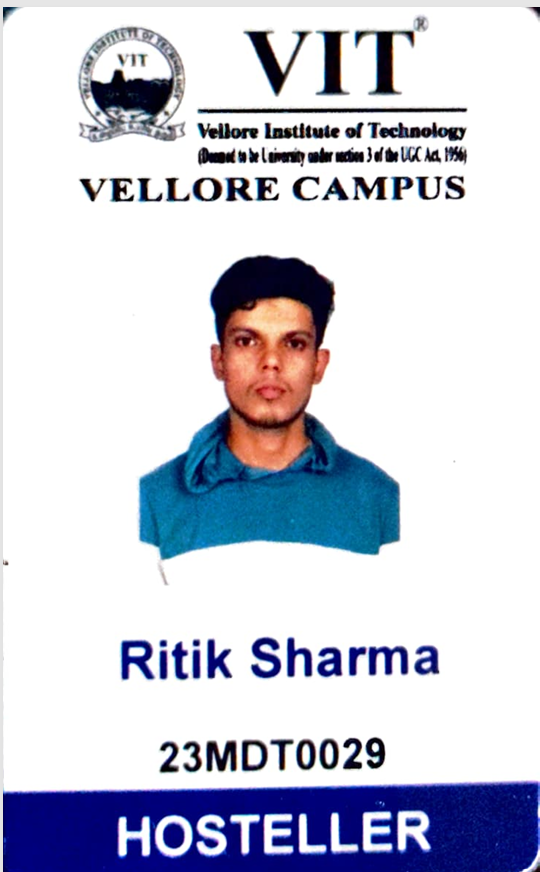

In [28]:
from IPython.display import Image, display
display(Image(filename="C:/Users/sharm/Downloads/Screenshot 2024-07-31 115558.png"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ...,np.newaxis],y_train[55000:]
X_train,y_train=X_train[:55000,...,np.newaxis],y_train[:55000]
X_test=X_test[...,np.newaxis]

In [3]:
print("Image Shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set:   {} samples".format(len(X_val)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


In [4]:
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train.shape))
print("-Validation set: {}".format(X_val.shape))
print("-Test set: {}".format(X_test.shape))

Updated Image Shape for: 

-Training set: (55000, 32, 32, 1)
-Validation set: (5000, 32, 32, 1)
-Test set: (10000, 32, 32, 1)


In [5]:
# Normalization

X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

# Def LeNet_5():
model=Sequential()

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(32,32,1),padding='valid'))

# P1: (None,28,28,6) -> (None,14,14,6)
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())

# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))

# FC1: (None, 120) -> (None,84).
model.add(Dense(84, activation='tanh'))

# FC1: (None, 84) -> (None,10).
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

C:\Users\sharm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7303 - loss: 1.0116 - val_accuracy: 0.9374 - val_loss: 0.2377
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9153 - loss: 0.2868 - val_accuracy: 0.9554 - val_loss: 0.1717
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9364 - loss: 0.2129 - val_accuracy: 0.9620 - val_loss: 0.1362
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9494 - loss: 0.1666 - val_accuracy: 0.9700 - val_loss: 0.1130
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9597 - loss: 0.1378 - val_accuracy: 0.9736 - val_loss: 0.0973


In [7]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [8]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [9]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0321



Plot of training error over 5 epochs:


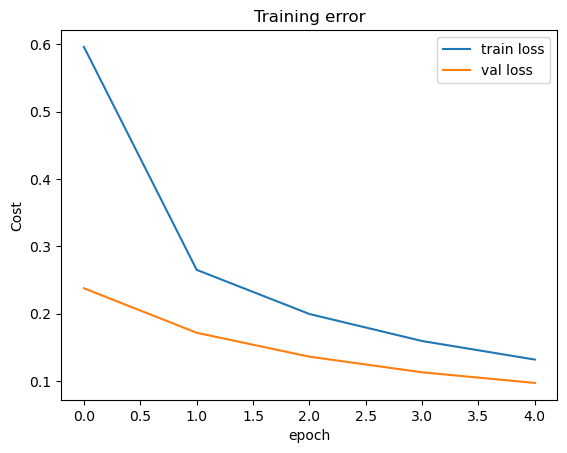

In [10]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [11]:
#return model
history = model.fit(X_train, y_train,validation_data = [X_val,y_val],epochs=15)

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9673 - loss: 0.1140 - val_accuracy: 0.9772 - val_loss: 0.0866
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9712 - loss: 0.0994 - val_accuracy: 0.9788 - val_loss: 0.0806
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9751 - loss: 0.0853 - val_accuracy: 0.9806 - val_loss: 0.0725
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9772 - loss: 0.0789 - val_accuracy: 0.9812 - val_loss: 0.0697
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9777 - loss: 0.0743 - val_accuracy: 0.9820 - val_loss: 0.0637
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9817 - loss: 0.0634 - val_accuracy: 0.9830 - val_loss: 0.0613
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0598 - val_accuracy: 0.9832 - val_loss: 0.0565
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9837 - loss: 0.

In [12]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [13]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [14]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0152



Plot of training error over 5 epochs:


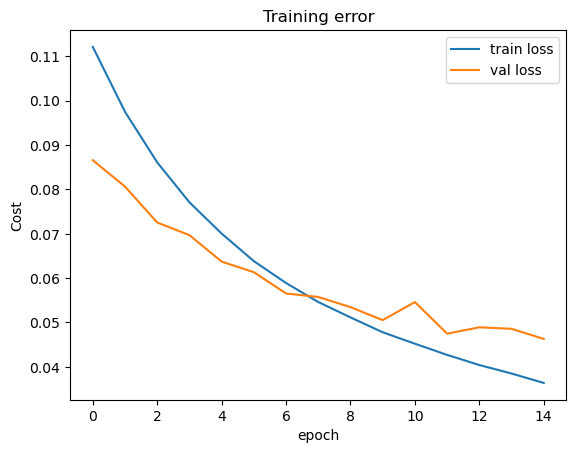

In [15]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [16]:
#def LeNet_5():
model = Sequential() #model is sequential connected layers

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,1), padding='valid'))

# P1: (None,28,28,6) -> (None,14,14,6).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')) #vaild means no padding, same means padding required
# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())
 
# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='relu'))

# FC2: (None,120) -> (None,84).
model.add(Dense(84, activation='relu'))

# FC3: (None,84) -> (None,10).
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [17]:
history = model.fit(X_train, y_train,validation_data = [X_val,y_val],epochs=20)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5194 - loss: 1.4400 - val_accuracy: 0.9420 - val_loss: 0.2094
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9274 - loss: 0.2362 - val_accuracy: 0.9302 - val_loss: 0.2171
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9509 - loss: 0.1594 - val_accuracy: 0.9678 - val_loss: 0.1134
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9603 - loss: 0.1293 - val_accuracy: 0.9722 - val_loss: 0.1018
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9679 - loss: 0.1070 - val_accuracy: 0.9776 - val_loss: 0.0882
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9707 - loss: 0.0923 - val_accuracy: 0.9772 - val_loss: 0.0824
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9746 - loss: 0.0812 - val_accuracy: 0.9806 - val_loss: 0.0806
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9770 - loss: 0

In [18]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [20]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0165



Plot of training error over 5 epochs:


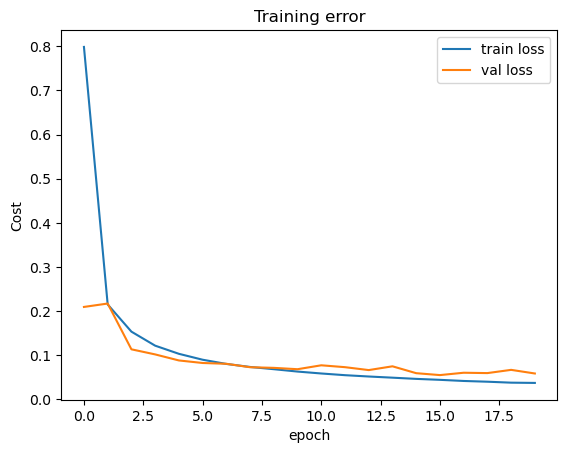

In [21]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [22]:
#def LeNet_5():
model = Sequential() #model is sequential connected layers

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
# P1: (None,28,28,6) -> (None,14,14,6).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')) #vaild means no padding, same means padding required

# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())
 
# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))
# FC2: (None,120) -> (None,84).
model.add(Dense(84, activation='tanh'))
# FC3: (None,32) -> (None,10).
model.add(Dense(32, activation='tanh'))
# FC3: (None,84) -> (None,10).
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [23]:
history = model.fit(X_train, y_train,validation_data = [X_val,y_val],epochs=20)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6807 - loss: 1.1782 - val_accuracy: 0.9272 - val_loss: 0.2968
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9084 - loss: 0.3332 - val_accuracy: 0.9482 - val_loss: 0.2007
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9316 - loss: 0.2359 - val_accuracy: 0.9602 - val_loss: 0.1503
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9469 - loss: 0.1838 - val_accuracy: 0.9674 - val_loss: 0.1198
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9572 - loss: 0.1454 - val_accuracy: 0.9726 - val_loss: 0.1011
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9669 - loss: 0.1188 - val_accuracy: 0.9762 - val_loss: 0.0889
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9701 - loss: 0.1047 - val_accuracy: 0.9780 - val_loss: 0.0800
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9749 - loss: 0

In [24]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [26]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0158



Plot of training error over 5 epochs:


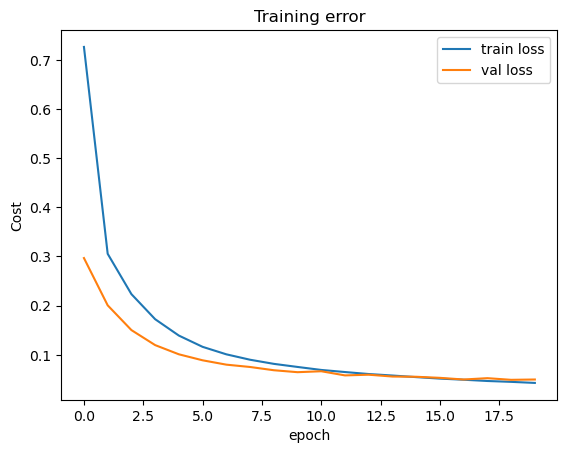

In [27]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()